In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
data = pd.read_csv("loadpekerjaan.csv")
data.head()

,load,man_power,durasi,kondisi_tim,class
0,1,7,2,1,1
1,2,11,3,1,2
2,2,8,6,2,3
3,2,8,2,2,2
4,2,8,6,2,3


In [ ]:
feature_cols = ['load', 'man_power', 'durasi', 'kondisi_tim']
X = data[feature_cols] # Features
y = data['class'] # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3333333333333333


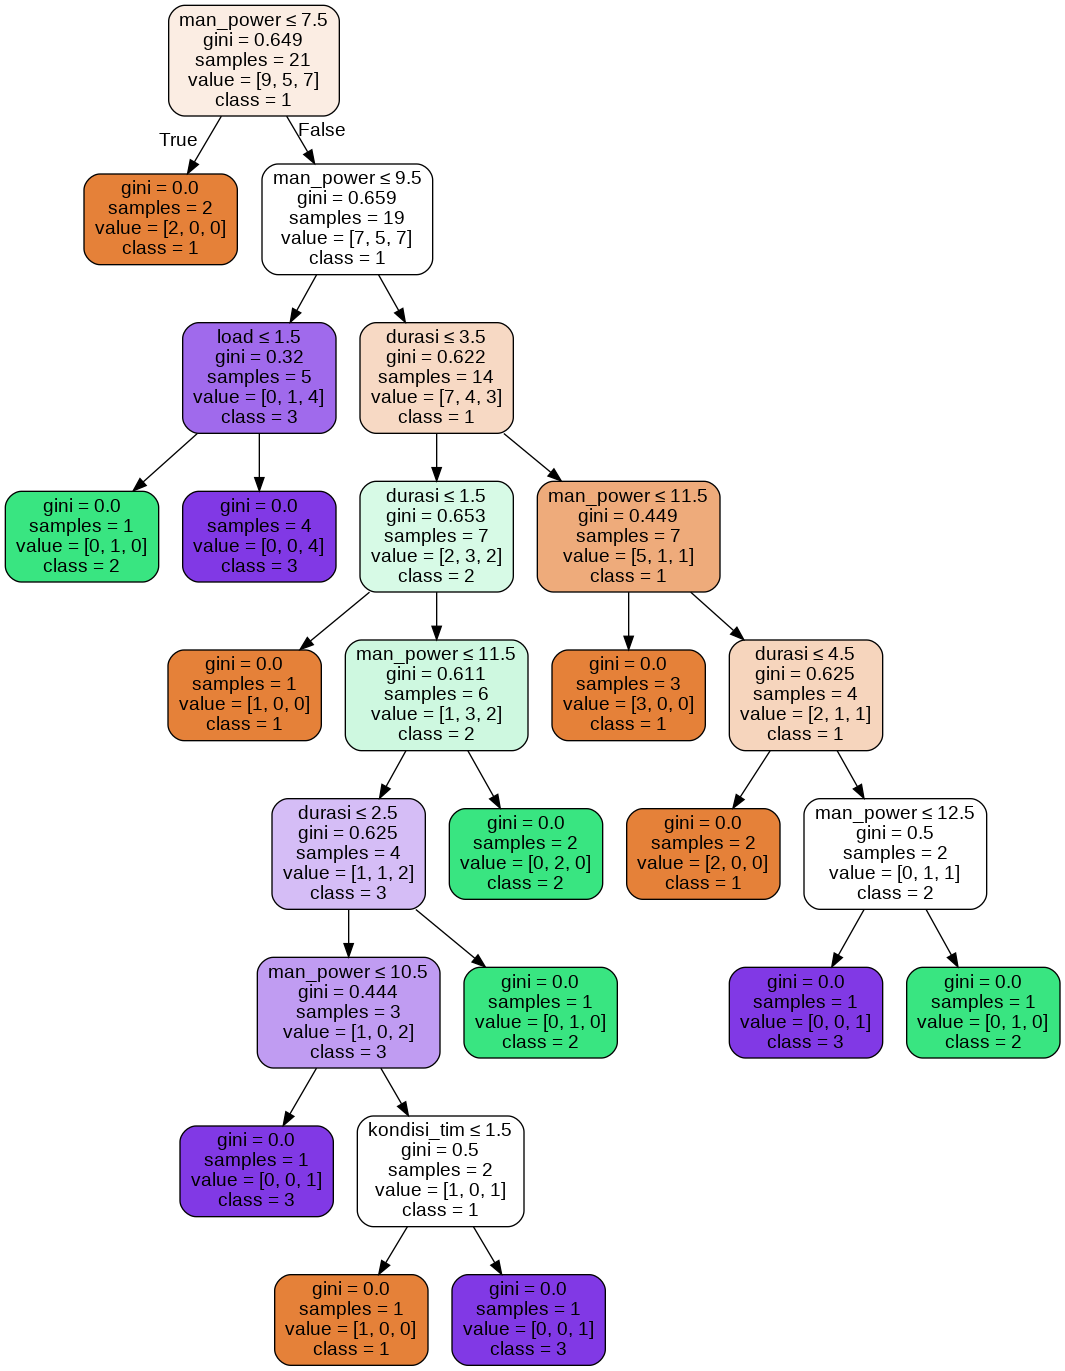

In [9]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['1','2','3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('load.png')
Image(graph.create_png())